## Introduction to network-based analysis in biomedicine with python (Part 1)

#### Topic overview:

##### 1. Introduction to biological networks

##### 2. Databases for creating biological networks

##### 3. Construction of biological networks

##### 4. Basic concepts of network analysis

### What are networks?
Generally speaking, networks are a group or system of interconnected entities. Here, entities could be anything — persons, computers, etc.
Networks are usually represented as graphs of a collection of nodes connected by edges denoting the interaction or association between the nodes.

<img src="Figures/Network_node_edge.png" alt="Network node edge" style="margin: auto; width:400px"/>
<b>Figure:</b> Representation of network as set of nodes connected by edges.

Image from https://builtin.com/data-science/social-network-analysis

### Networks in biology
Biological system functions as a result of interaction between its components (proteins, genes, metabolites, etc). Networks provide a way to understand the patterns of interactions within a biological system.

### Types of networks
- <b>Directed or undirected:</b> A network in which the edges infer the direction of interaction between the nodes is referred to as directed network. An undirected network does not inform the direction of interaction between the nodes. Gene regulatory neworks are usually represented as directed networks while gene co-expression networks are usually represented as undirected networks.
- <b>Weighted or unweighted:</b> In a weighted network, the strengths of interaction between the nodes is represented as an edge attribute. Unweighted networks do not provide information on the strength of interactions. 
- <b>Homogeneous or heterogeneous:</b> A network in which all the nodes are of same type are referred to as homogeneous network (g. protein-protein interaction network) whereas networks containing nodes of different types are reperred to as heterogenous network (eg. drug-target network).
- <b>Knowledge-based or data driven:</b> Knowledge-based networks are created by aggregating interaction information between different biological entities that are spread across the literature while data driven networks are created from high-throughput experimental data. A list of databases that can be used to create knowledge-based or data-driven network can be found <a href="https://doi.org/10.1093/bib/bbac229" target = "_blank">here</a>.
</br>
<img src="Figures/BIB_Network_Review_Fig1.jpeg" alt="types of network" style="margin: auto; width:70%"/>
</br>
<b>Figure:</b> Different types of networks. (A) An undirected-unweighted network provide information only regarding the possible connections between the nodes. No information is provided regarding the type of interaction or its strength. (B) Directed network on the other hand provides information about the direction of interaction, (C) while weighted network tell about the strength of the interaction often denoted by edge. (D) Multiplex networks are formed by obtaining interaction information from different sources for the same set of nodes. Each layer on a multiplex network refers to interaction from different sources. As the nodes within each layer is of similar type, the network within each layer could be referred to as homogenous network. (E) In contrast to homogenous network, heterogenous network involves interaction between different types of nodes.

Image from <a href="https://doi.org/10.1093/bib/bbac229" target="_blank">Network approaches for modeling the effect of drugs and diseases </a>

</br>
In following sections we will introduce the differnt databases that can be used to create a knowledge-based network.

### Databases for creating biological networks
- <strong>STRING: </strong>STRING (<a href="https://string-db.org/cgi/input" target = "_blank">string-db.org</a>) is a database of known and predicted, direct physical and indirect functional protein-protein interactions. The data in STRING is obtained from five major sources including automated text mining or scientific literature, primary protein-protein interaction knowledgebases, co-expression, high-throughput experiments, and genomic context prediction. STRING is probably the largest protein-protein interaction network covering over 14000 organisms (Licata et al., 2012).
- <strong>BioGRID: </strong> BioGRID (<a href="https://thebiogrid.org/" target = "_blank">thebiogrid.org</a>) is a primary database archiving genetic and protein interaction data from human and other model organisms (Oughtred et al., 2021). Besides archiving all reported interactions for organisms, current focus is also on to curate conserved networks and pathways that are relevant to human health. The interactions are curated from published biomedical literature involving both low-throughput and high-throughput experiments. Apart from the protein-protein interactions and interaction between proteins and functional genetic elements, BioGRID also stores information on chemical-protein interactions retrieved from databases like DrugBank, ChemSpider, BindingDB and PDB.
- <strong>DrugBank: </strong> DrugBank (<a href="https://go.drugbank.com/" target = "_blank">go.drugbank.com</a>) is a comprehensive repertoire of approved as well as experimental and investigational drugs. Besides molecular information of each drug, it also provides information pertaining to associations between drugs, drug-targets, and diseases. DrugBank is also one of the largest resources of manually curated drug–drug interactions reporting both adverse and beneficial interactions. 
- <strong>Therapeutic Target Database: </strong> The Therapeutic Target Database (TTD) (<a href="http://db.idrblab.net/ttd/" target = "_blank">db.idrblab.net/ttd</a>) collects information on known and explored therapeutic protein and nucleic acid targets along with information on the targeted disease, pathway information and the corresponding drugs for each of the targets.
- <strong>DisGeNET: </strong> DisGeNET (<a href="https://www.disgenet.org/" target = "_blank">www.disgenet.org</a>) is one of largest publicly available resource of genes and variants associated to human diseases. The data in DisGeNET is sourced from expert curated repositories, GWAS catalogues, animal models and the scientific literature. 
- <strong>PharmGKB: </strong> PharmGKB (<a href="https://www.pharmgkb.org/" target = "_blank">www.pharmgkb.org</a>) is a pharmacogenomic knowledgebase hosting information on impact of genetic variation on drug responses in human. 
- <strong>OpenTargets: </strong> The OpenTargets (<a href="https://www.opentargets.org/" target = "_blank">www.opentargets.org</a>)  project is aimed at identification and prioritization of drug targets based on human genetics and genomics data.

<p style="padding: 10px 10px 10px 10px; border: 2px solid blue;">
<b>Box 1: Tools for creating and visualising networks</b><br>
<b>Python: </b>NetworkX, python-igraph<br>
<b>R: </b>igraph<br>
</p>

In [1]:
# Upload python modules
import numpy as np
import networkx as nx
import powerlaw

# Import python modules for visualizations
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

### Network representation

Networks are most naturally visualized as a set of points (nodes) connected by lines (edges).

<img src="./Figures/Graph_random_circle.png" width=200/>

This data is typically stored as a list of edges, for the figure above we would have G = {A,B}, {B,A}, {B,C}. Another equivalent form is the adjacency matrix, which is less intuitive, but mathematically appealing (color code: black=1; white=0).

<img src="./Figures/Matrix_example.png" width=400/>



### Network construction

From scratch. Let's construct the matrix (numpy array), A representing the following graph. 

<img src="./Figures/Network_construction_1.png" width=200/>

We will write the connection from row to column (e.g. the link from 1 to 3 should be at the 1st row and 3rd column). Note this convention is not always consistent.

In [2]:
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])
       
A

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

NetworkX is a python library specialized for working with graphs. They provide a class networkx.Graph which stores a network as a list of edges. We can convert freely between the different representations using networkx.

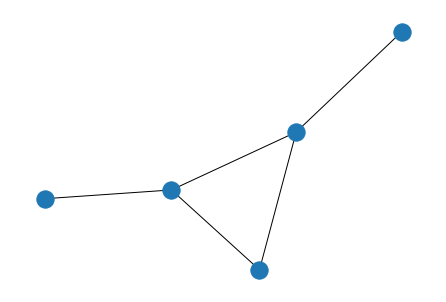

In [3]:
import networkx as nx
G = nx.from_numpy_array(A)
nx.draw(G)

**Directedness and weightedness**

We have two questions of network properties to consider when making a model:
- is the edges directed or undirected?
- are the edges continuous or binary?

We can use the nx.DiGraph class to force it to create a directed graph.

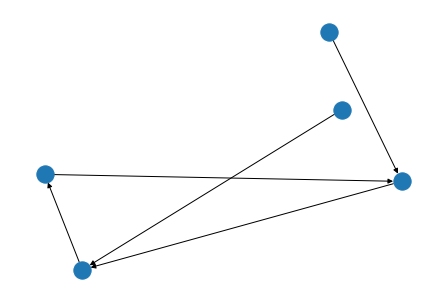

In [4]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G_dir)

**Number of nodes and edges**

In [5]:
print("number of nodes: ",  G.number_of_nodes())
print("number of edges: ", G.number_of_edges())

number of nodes:  5
number of edges:  5


<strong>How to compute the total number of possible edges?</strong>

Let’s assume an undirected graph with N vertices. Further, we’re also assuming that the graph has a maximum number of edges. In such a case, from the starting vertex, we can draw (N-1) edges in the graph. Continuing this way, from the next vertex we can draw (N-2) edges, etc.

*(N-1) + (N-2) + ... + 2 + 1 = (N*(N-1))/2*


We can convert an undirected graph into a directed graph by replacing each edge with two directed edges. Hence the revised formula for the maximum number of edges in a directed graph: is *N*(N-1)*


**Node names**

In [6]:
print(G.nodes)
print(1 in G.nodes())
print(5 in G.nodes())

[0, 1, 2, 3, 4]
True
False


**Drawing the network**

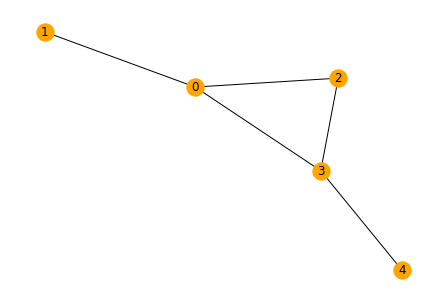

In [7]:
nx.draw(G, with_labels=True, node_color='orange')

**Let us try creating a small protein protein interaction network from STRINGdb.**

The simpliest way to create a network is to supply a list of edges. Most of the aforementioned databases stores interaction information as table of interacting nodes where each row of the table represents an edge. Besides the two connected nodes, the table may include other related information that can be used as node or edge attribute in the network.


<p style="padding: 10px 10px 30px 10px; border: 2px solid blue;">
<b>Box 2: Example STRING PPI network</b></br>
The example PPI network used in this tutorial is a part of the larger human interactome in STRINGdb. The network contains proteins surrounding JAK1, JAK2, TMPRSS2 and AR, connected by reported physical interactions. The proteins JAK1 AND JAK2 are established drug target for myelofibrosis and currently in clinical trial to establish their potential as drug target for Covid-19. Similarly, TMPRSS2 is also under clinical trial for Covid-19. AR is a successful target for acute myeloid leukaemia and alcoholic hepatitis.
</p>

In [8]:
# Reading the edgelist from STRING
import pandas as pd
edge_list = pd.read_table("Data/1_STRING_network.tsv")
edge_list.head()

,node1,node2,node1_string_id,node2_string_id,homology,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,AR,FOXA1,9606.ENSP00000363822,9606.ENSP00000250448,0,0.494,0.9,0.892,0.994
1,AR,HSP90AA1,9606.ENSP00000363822,9606.ENSP00000335153,0,0.494,0.9,0.898,0.994
2,AR,TMPRSS2,9606.ENSP00000363822,9606.ENSP00000381588,0,0.483,0.0,0.119,0.525
3,AR,NCOA2,9606.ENSP00000363822,9606.ENSP00000399968,0,0.945,0.9,0.793,0.998
4,AR,NCOA4,9606.ENSP00000363822,9606.ENSP00000463027,0,0.933,0.9,0.871,0.999


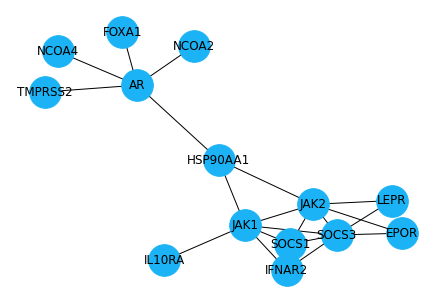

In [9]:
# Creating network from edge list 
import networkx as nx
STRING_PPI = nx.from_pandas_edgelist(df = edge_list,
                            source = "node1", 
                            target = "node2",
                            edge_attr = "combined_score")
STRING_PPI_pos = nx.spring_layout(STRING_PPI, seed = 20)
# STRING_PPI_pos = nx.circular_layout(STRING_PPI)
nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

### Network properties
A primary task after creating a network is to explore its properties, and particularly topological properties, which can help us identify relevant sub-structures within a network.

*Properties derived from element-level analysis:*

- <b>Centrality</b>

*Properties derived from group-level analysis*: 

- **Connected components**
- **Communities**
- **Cliques**

*Properties derived from network-level analysis*: 

- **Density**
- **Network diameter**
- **Network radius**
- **Scale-free networks**
- **Clustering coefficient**
- **Network modularity**

In [10]:
# Get basic properties of the network
print("Number of nodes:", STRING_PPI.number_of_nodes())
print("Number of edges:", STRING_PPI.number_of_edges())
print("Number of connected components:", nx.number_connected_components(STRING_PPI))
print("Number of isolated nodes:", nx.number_of_isolates(STRING_PPI))
print("Number of self loops:", nx.number_of_selfloops(STRING_PPI))
print("Diameter of network:", nx.diameter(STRING_PPI))
print("Radius of network:", nx.radius(STRING_PPI))
print("Average clustering coefficient:", nx.average_clustering(STRING_PPI))
print("Average shortest path length:", nx.average_shortest_path_length(STRING_PPI))
print("Network density:", nx.density(STRING_PPI))

Number of nodes: 14
Number of edges: 21
Number of connected components: 1
Number of isolated nodes: 0
Number of self loops: 0
Diameter of network: 4
Radius of network: 2
Average clustering coefficient: 0.38809523809523805
Average shortest path length: 2.4725274725274726
Network density: 0.23076923076923078


#### Quantifying the importance of a node within a network

A bunch of graph metrics exist that quantify importance of a node within a network.
These are collectively termed "centrality", but all quantify slightly different things.

- degree centrality
- betweenness centrality
- closeness centrality


##### Degree centrality

The degree of a node measures the number of direct neighbours it has. It is calculated as the sum of all edges connected to that node (here indicated with *i*). Mathematically, for undirected network with an adjacency matrix ${A}$,

$$
\text{C}_\text{Degree}{(i)} = \sum_{j=1}^{n}A_ij
$$

In a directed network, depending on the number of incoming and outgoing edges, degree can be in-degree or out-degree. Higher the degree of a node, more centrally located it is. 

To be noted, in the python package NetworkX, the degree() function returns the absolute number of edges connected to each node of the input graph.

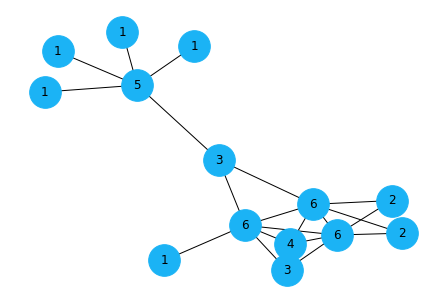

In [11]:
# Calculating degree for each node of the network
node_degree = dict(STRING_PPI.degree())
nx.draw(STRING_PPI, labels = node_degree, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

On the other hand, the function degree_centrality() returns degree of each node normalised by dividing with the maximum possible degree in a simple graph.

$$
\text{C}_\text{Degree}{(j)} = \frac{\sum_{j=1}^{n}A_ij}{n-1}
$$
where ${n}$ is the total number of nodes in the network.

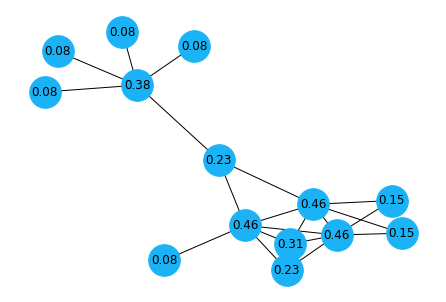

In [12]:
degree_centrality = nx.degree_centrality(STRING_PPI)
degree_centrality = {key : round(degree_centrality[key], 2) for key in degree_centrality}
nx.draw(STRING_PPI, labels = degree_centrality, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

##### Betweenness centrality

The betweenness of node is the sum of all shortest paths that pass through that node. Nodes with high betweenness in a network often act as bridge between connecting different parts of the network. Nodes with high betweenness  play an important role in modularization of the network.

$$
\text{C}_{Betweenness}{(v)} = \sum_{s \neq v \neq t}\frac{\sigma_{st}{(v)}}{\sigma_{st}}
$$

where $\sigma_{st}$ is the total number of shortest paths from ${s}$ to node ${t}$ and $\sigma_{st}{(v)}$ is the number of those paths passing through node ${v}$ (not where node ${v}$  is an end-point).


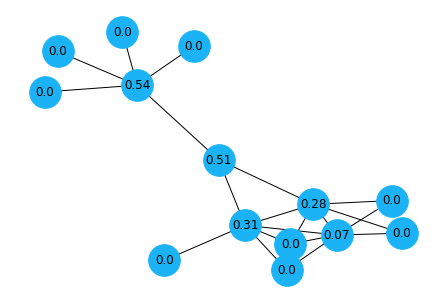

In [13]:
betweenness_centrality = nx.betweenness_centrality(STRING_PPI)
betweenness_centrality = {key : round(betweenness_centrality[key], 2) for key in betweenness_centrality}
nx.draw(STRING_PPI, labels = betweenness_centrality, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

##### Closeness centrality

The closeness centrality of a node measures how close the node is to all other nodes in the network. It is calculated as the sum of all shortest paths from the node to all other nodes in the network. A higher value of closeness centrality for a node indicate higher centrality. A node with high closeness centrality can quickly communicate with other nodes in the network. 


$$
\text{C}_{Closeness}{(v)} = \frac{|N|-1}{\sum_{u}{d(u,v)}}
$$


where ${d(u,v)}$ is the distance (length of shortest path) of node ${u}$ from node ${v}$ and ${|N|}$ is the total number of nodes the network.

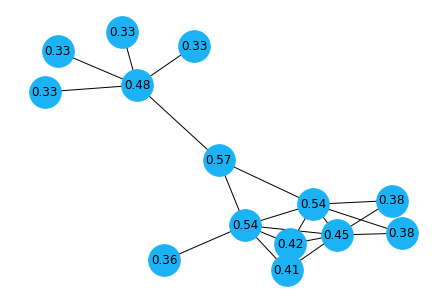

In [14]:
closeness_centrality = nx.closeness_centrality(STRING_PPI)
closeness_centrality = {key : round(closeness_centrality[key], 2) for key in closeness_centrality}
nx.draw(STRING_PPI, labels = closeness_centrality, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

##### Eccentricity 
The maximum distance between a node to all other node is considered as the eccentricity of node. It shows how accissible is a node from other nodes in the network. For a disconnected graph, all nodes are defined to have infinite eccentricity.

 
$$
\text{C}_{Eccentricity}{(v)} = \epsilon{(v)} = \max_{u \in N}{d(u, v)}
$$

where ${d(u,v)}$ is the distance (length of shortest path) of node ${u}$ from node ${v}$ and ${N}$ is the set of all nodes in the network.

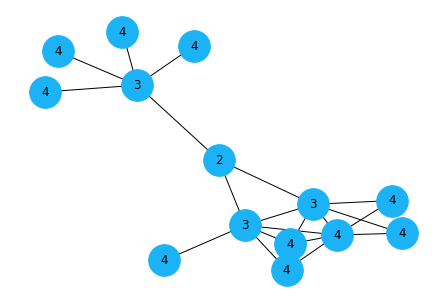

In [15]:
eccentricity_centrality = nx.eccentricity(STRING_PPI)
nx.draw(STRING_PPI, labels = eccentricity_centrality, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

In [16]:
centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality),
                                    "Eccentricity" : pd.Series(eccentricity_centrality)})
centrality_table

,Degree centrality,Betweenness,Closeness centrality,Eccentricity
AR,0.38,0.54,0.48,3
FOXA1,0.08,0.00,0.33,4
HSP90AA1,0.23,0.51,0.57,2
TMPRSS2,0.08,0.00,0.33,4
NCOA2,0.08,0.00,0.33,4
NCOA4,0.08,0.00,0.33,4
EPOR,0.15,0.00,0.38,4
SOCS3,0.46,0.07,0.45,4
JAK2,0.46,0.28,0.54,3
JAK1,0.46,0.31,0.54,3


<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 3: Exercise</b>
Are the nodes with the highest centralities same? In the network, plot the nodes with highest centralities.
</p>

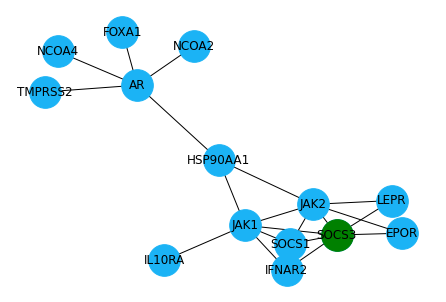

In [17]:
# Hint
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:1].index)
nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_degree, node_size = 1000, node_color = "green")
plt.show()

#### Group-level analysis

Molecular networks are often made up of subsets of biological entities (or molecular features) that interact more intensely among each other than they do with the rest of the network, and it is often very important in research and analysis to identify or approximate these subsets as best as possible so that they can be studied more closely. In complex networks, this is not an easy task. Most of the computational methods we have available to us for finding densely connected subsets of vertices (usually called communities).

##### Connected components

An important concept within methods for community detection is "connected component".

A connected component of a graph is a connected subset of vertices, none of which are connected to any other vertex in the graph. Alternately, a connected component can be defined as a group of nodes for which there exist at least one path  between any two nodes of the group but there exists no path between the nodes of another group. In a fully connected graph, there is only one component i.e. all nodes are connected to each other directly or indirectly. In an empty graph, there are no edges connecting the nodes and each node acts as an individual component.

Connected components can help finding connected clusters.



Number of connected components: 3


[9, 4, 1]

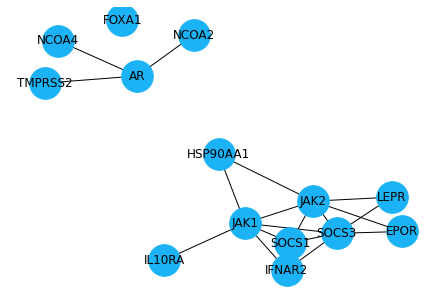

In [18]:
# Example network with three connected component
edge_remove = [("AR", "HSP90AA1"), ("AR", "FOXA1")]
STRING_PPI_cc = STRING_PPI.copy()
STRING_PPI_cc.remove_edges_from(edge_remove)
nx.draw(STRING_PPI_cc, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

print("Number of connected components:", nx.number_connected_components(STRING_PPI_cc))

# Print the number of nodes in each component
[len(c) for c in sorted(nx.connected_components(STRING_PPI_cc), key = len, reverse = True)]


9 16


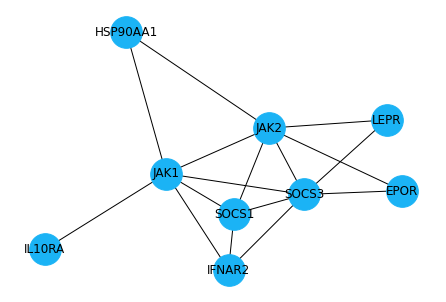

In [19]:
# Extract the largest connected component
STRING_PPI_largestComp = list(STRING_PPI_cc.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_PPI_cc), key = len, reverse = True))[0]
print(len(STRING_PPI_largestComp.nodes()), len(STRING_PPI_largestComp.edges()))
nx.draw(STRING_PPI_largestComp, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")


##### Cliques

A clique is a subset of vertices of an undirected graph G such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. In more practical terms, a set of nodes forms a clique (equivalently, a complete subgraph) if all possible connections between nodes exist. A two-node clique is simply two connected nodes. A three node clique is also known as a triangle.
A maximal clique is a clique that cannot be extended by including one more adjacent vertex, that is, a clique which does not exist exclusively within the vertex set of a larger clique.
A maximum clique of a graph, G, is a clique, such that there is no clique with more vertices. Moreover, the clique number ω(G) of a graph G is the number of vertices in a maximum clique in G.

Example

<img src="./Figures/Clique.png" alt="alt text" title="Image from " width="450" height="450"/>

Image from https://math.stackexchange.com/questions/758263/whats-maximal-clique


*Can you indicate the maximal and maximum clique?*


Maximal clique enumeration is NP-hard problem.

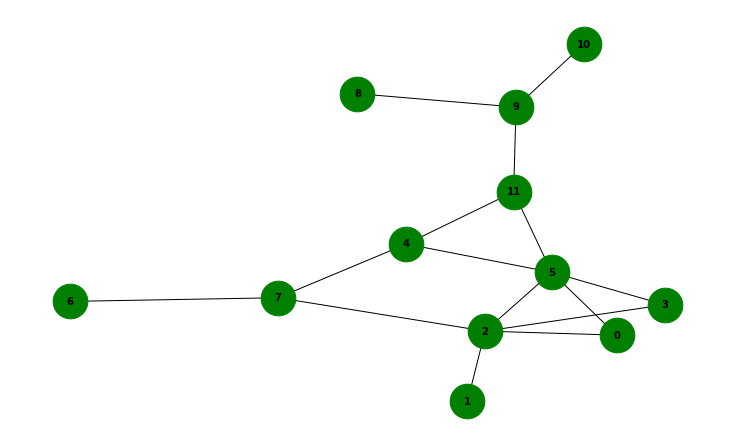

In [20]:
# Let's now generate a random graph with several partitions
Gc = nx.planted_partition_graph(4, 3, 0.5, 0.1, seed=42)
#visualize the graph
pos = nx.spring_layout(Gc, seed=123)
plt.figure(figsize=(10,6))
nx.draw(Gc, pos=pos, node_size=1200, node_color='green',
        font_size=10, font_weight='bold', with_labels=True)


This algorithm is not suitable for directed graphs. This algorithm ignores self-loops and parallel edges as clique is not conventionally defined with such edges. There are often many cliques in graphs. This algorithm can run out of memory for large graphs.

#### Network-level analysis


##### Density

The density of a network is the ratio of the number of edges present in the network to the total number of possible edges. The density of a network can range from 0 for empty or disconnected network to 1 for completely connected network.

$$
Density = \dfrac{\text{Number of edges in the network}}{\text{Total number of edges in the network}} = \dfrac{2|E|}{|N|(|N|-1)}
$$
where${|E|}$ is the number of edges in the network and ${|N|}$ is the number of nodes in the network}.

The density d(G) of a graph is a measure of how many links between nodes exist compared to how many links between nodes are possible, given the graph size (number of nodes) and the graph order (number of links).

The density of a network property is important to consider for two reasons. First, it can help us understand how connected the network is compared to how connected it might be. Second, when comparing two networks with the same number of nodes and the same type of relationships, it can tell us how the networks are different.

For example, let us imagine that there are two gene networks representing two different stages of the same disease. Is a major density linked to a stage where the disease is more resistant to drug treatments? 



Network density: 0


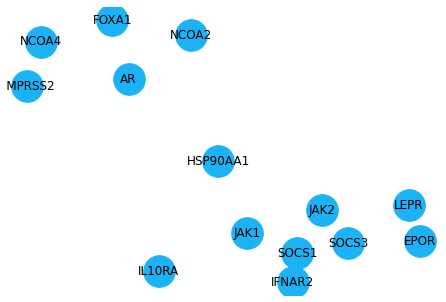

In [21]:
# Example network with density 0
STRING_PPI_den0 = STRING_PPI.copy()
edge_remove = list(STRING_PPI_den0.edges)
STRING_PPI_den0.remove_edges_from(edge_remove)
nx.draw(STRING_PPI_den0, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
print("Network density:", nx.density(STRING_PPI_den0))

Network density: 0.23076923076923078


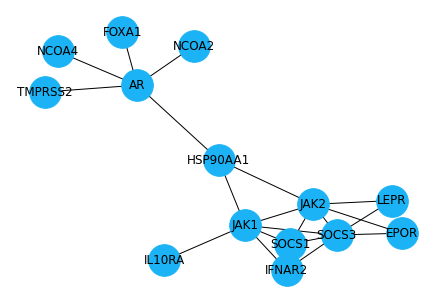

In [22]:
# Density of the STRING PPI network
nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
print("Network density:", nx.density(STRING_PPI))

Network density: 1.0


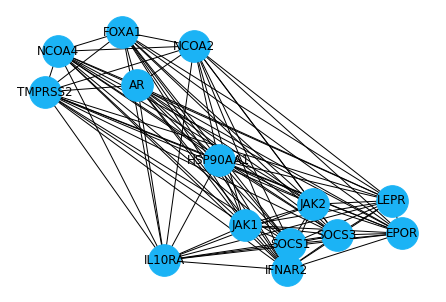

In [23]:
# Example network with density 1
STRING_PPI_den1 = nx.complete_graph(STRING_PPI.nodes)
nx.draw(STRING_PPI_den1, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
print("Network density:", nx.density(STRING_PPI_den1))

##### Network diameter and radius

The maximum eccentricity of all nodes in the network is referred to as the diameter of the network while the minimum eccentricity is referred to as the radius of the network.

$$
\text{diameter} = \max_{v \in N} \epsilon{(v)} = \max_{v \in N} \max_{u \in N}{d(u, v)}
$$

In other words, diameter of a network is the shortest paths connecting the most distant nodes in the network.


$$
\text{radius} = \min_{v \in N} \epsilon{(v)} = \min_{v \in N} \max_{u \in N}{d(u, v)}
$$

where ${d(u,v)}$ is the distance (length of shortest path) of node ${u}$ from node ${v}$ and ${N}$ is the set of all nodes in the network.

In [24]:
print("Diameter of network:", nx.diameter(STRING_PPI))
print("Radius of network:", nx.radius(STRING_PPI))

Diameter of network: 4
Radius of network: 2


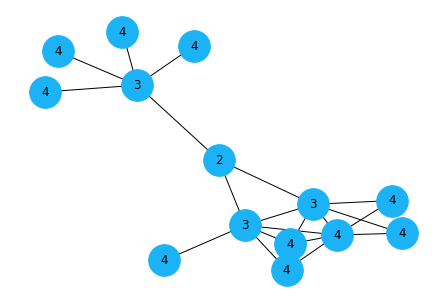

In [25]:
eccentricity = nx.eccentricity(STRING_PPI)
nx.draw(STRING_PPI, labels = eccentricity, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

##### Scale-free topology

A scale-free network is a network whose degree distribution follows a power law, at least asymptotically. 

A network is deemed scale free if the fraction of nodes with degree $k$ follows a power-law distribution $k^{-α}$, where $2<α<3$. The smaller the value of $α$ the more important the role of hubs in the network while at $α>3$ the hubs are not relevant.

In more practical terms, in scale-free networks most of the nodes are connected to a low number of neighbours and there are a small number of high-degree nodes (hubs) that provide high connectivity to the network. 

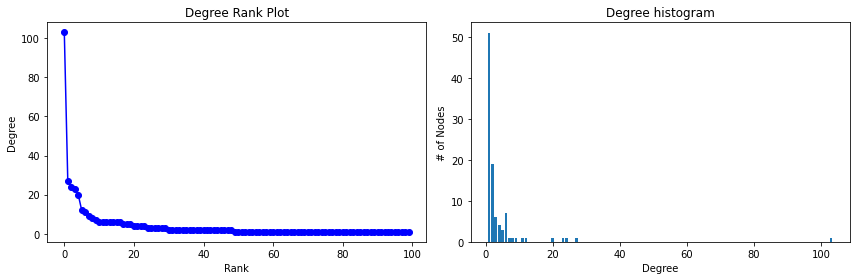

In [26]:
# Let's create an example of 
G = nx.scale_free_graph(100, seed=10374196)

# Then, let's visualize how the node degree variate across the network

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Let's now see how to verify whether the given network follows a power law. 

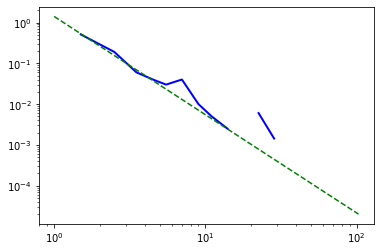

Value of alpha: 2.4080044660888165


In [27]:
# First, create a degree distribution variable from our network
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test

# Then fit the data to powerlaw distributions:
# Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin=1) 

# Then you can plot:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
plt.show()
print("Value of alpha:", fit.power_law.alpha)


##### Clustering coefficient

Clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.

Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes.

The clustering coefficient of a node or local clustering coefficient is measured as the ratio of number of actual connections between the nodes of a neighbour to the number of all the possible connections. The clustering coefficient of a network is the average of the clustering coefficients of the nodes in the network. The value of clustering coefficient ranges from 0 to 1. A network with high clustering coefficient indicates it contains communities or densely connected group of nodes.

<img src="./Figures/Clustering_coefficient.png" alt="Clustering coefficient" width="450" height="450"/>

<strong>Figure:</strong> Calculation of clustering coefficient of a node. 

Image from https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/

Average clustering coefficient: 0.38809523809523805


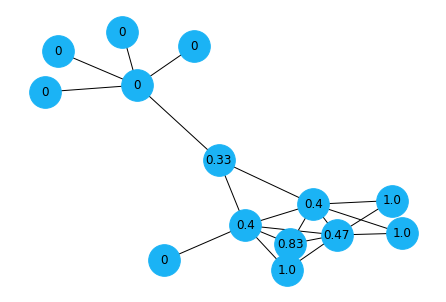

In [28]:
clustering_coef = nx.clustering(STRING_PPI)
clustering_coef = {key : round(clustering_coef[key], 2) for key in clustering_coef}
nx.draw(STRING_PPI, labels = clustering_coef, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
print("Average clustering coefficient:", nx.average_clustering(STRING_PPI))

##### Network modularity

Modularity is a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

<img src="./Figures/Network_mod_formula.png" alt="alt text" title="Image from " width="450" height="450"/>

where $m$ is the number of edges, $A_{i,j}$  is the adjacency matrix of G, $k$ is the degree of $i$, $γ$ is the resolution parameter, and $δ(c_{i},c_{j})$ is 1 if node $i$ and node $j$ are in the same community else 0.

If resolution is less than 1, modularity favors larger communities. Greater than 1 favors smaller communities.

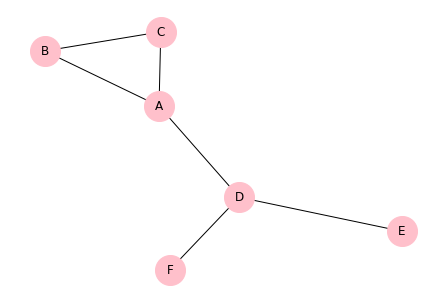

In [29]:
Gm = nx.Graph()
# add the nodes
nodelist = ['A','B','C','D','E','F']
Gm.add_nodes_from(nodelist)
# add the edges
edgeList = [('A','B'),('B','C'),('A','C'),('A','D'),('D','E'),('D','F')] #list of tuples
Gm.add_edges_from(edgeList) 
nx.draw(Gm, with_labels =True, node_color = 'pink', node_size = 900)

In [30]:
#import networkx.algorithms.community as nx_comm
nx.algorithms.community.modularity(Gm, [{'A', 'B', 'C'}, {'E','D','F'}])

0.3194444444444445

In [31]:
Gm.add_edge('E','C')
nx.algorithms.community.modularity(Gm, [{'A', 'B', 'C'}, {'E','D','F'}])

0.20408163265306123

In [32]:
Gm.remove_edge('E','C')
Gm.add_edge('E','F')
nx.algorithms.community.modularity(Gm, [{'A', 'B', 'C'}, {'E','D','F'}])

0.35714285714285715

In [33]:
# Modularity the STRING PPI networks used earlier
print(nx.algorithms.community.modularity(STRING_PPI, nx.connected_components(STRING_PPI)))
print(nx.algorithms.community.modularity(STRING_PPI, nx.connected_components(STRING_PPI_cc)))
print(nx.algorithms.community.modularity(STRING_PPI, nx.connected_components(STRING_PPI_den0)))
print(nx.algorithms.community.modularity(STRING_PPI, nx.connected_components(STRING_PPI_den1)))

0.0
0.25056689342403626
-0.10204081632653063
0.0


### Exercise session

- Load the network in Data/STRING_Covid_net.csv
- Retrieve the basic properties of the network like number of nodes, edges, density, diameter, radius, etc
- How many connected components are there in the network?
- Is the network modular?
- Plot the degree distribution? Is the network a scale free network?

Note: Instead of using the entire network, you may use the largest connected component.


### Self-study material:

- <a href = "https://ona-book.org/" target = "_blank">Handbook of Graphs and Networks in People Analytics by Keith McNulty</a>

- <a href = "http://olizardo.bol.ucla.edu/classes/soc-111/lessons-winter-2022/4-lesson-graph-metrics.html" target = "_blank">Graph Metrics</a>

#### Articles:

- <a href = "https://doi.org/10.3389/fbioe.2020.00034" target = "_blank">A Guide to Conquer the Biological Network Era Using Graph Theory</a>

- <a href = "https://doi.org/10.1186/1756-0381-4-10" target = "_blank">Using graph theory to analyze biological networks</a>

- <a href = "https://doi.org/10.1038/nrg1272" target = "_blank">Network biology: understanding the cell's functional organization</a>

- <a href = "https://www.researchgate.net/publication/342764859_ROLE_OF_NETWORK_BIOLOGY_IN_CANCER_RESEARCH" target = "_blank">Role of Network Biology in Cancer Research</a>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6f9e27d-71eb-4664-8c0d-e7e02cc44214' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>